### K means Algorithm

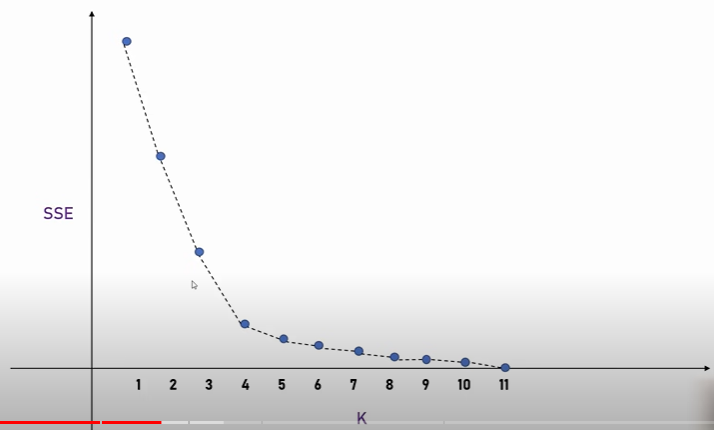

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\Sahil Patel\Downloads\income.csv")
df.head()

,Name,Age,Income
0,Riddhi,21,10000
1,Sahil,23,12000
2,Niashadh,24,13000
3,Pahini,22,14000
4,Jay,23,15000


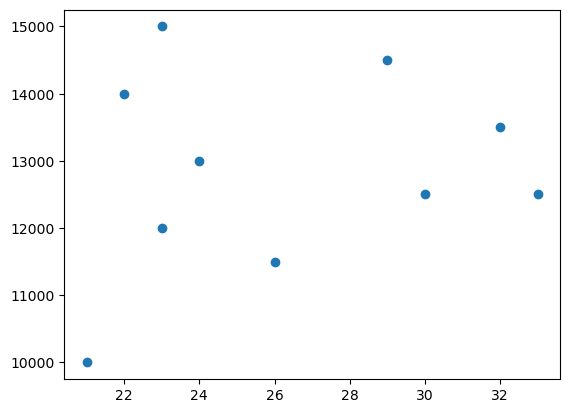

In [3]:
plt.scatter(df['Age'], df['Income'])

In [4]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_pred= km.fit_predict(df[['Age','Income']])
y_pred

c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 2, 1, 1, 2, 2, 1, 1, 2])

In [8]:
df['cluster']= y_pred
df.head()

,Name,Age,Income,cluster
0,Riddhi,21,10000,0
1,Sahil,23,12000,2
2,Niashadh,24,13000,2
3,Pahini,22,14000,1
4,Jay,23,15000,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

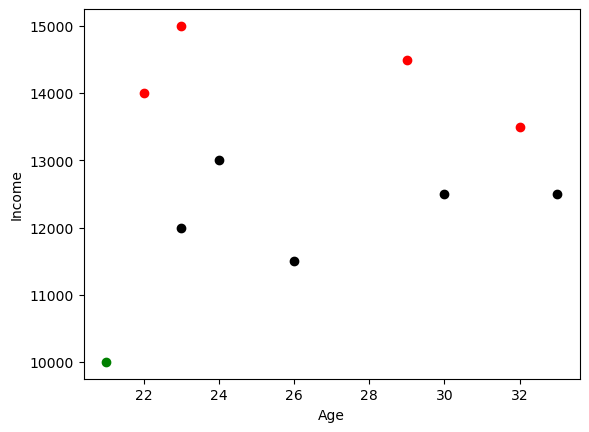

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend

##### The data is not scaled and hence the plotting looks a little off, hence we will use our min max scaler first to scale the values

In [22]:
scaler=MinMaxScaler()
scaler.fit(df[['Income','Age']]) ## here we use two square brakcets instead of one as one bracket means a series and we want to fit a df so two

df[['Income','Age']]= scaler.transform(df[['Income','Age']])
df

,Name,Age,Income,cluster
0,Riddhi,0.000000,0.0,0
1,Sahil,0.166667,0.4,2
2,Niashadh,0.250000,0.6,2
3,Pahini,0.083333,0.8,1
4,Jay,0.166667,1.0,1
5,Akash,0.416667,0.3,2
6,Harsh,1.000000,0.5,2
7,Yesha,0.916667,0.7,1
8,Komal,0.666667,0.9,1
9,Shivani,0.750000,0.5,2


In [23]:
y_pred= km.fit_predict(df[['Age','Income']])
y_pred

c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 2, 0, 1, 1, 1, 1])

In [25]:
df['cluster2']=y_pred
df.drop('cluster',axis='columns',inplace=True)

<function matplotlib.pyplot.legend(*args, **kwargs)>

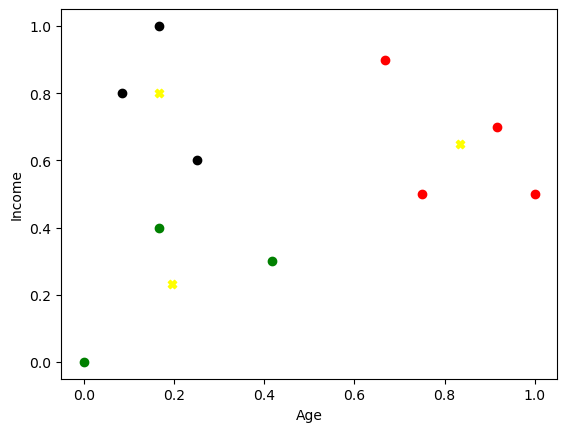

In [29]:
df1=df[df.cluster2==0]
df2=df[df.cluster2==1]
df3= df[df.cluster2==2]

plt.scatter(df1.Age,df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age,df3.Income,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='X',label= 'centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend

In [28]:
km.cluster_centers_

array([[0.19444444, 0.23333333],
       [0.83333333, 0.65      ],
       [0.16666667, 0.8       ]])

##### Elbow Method

In [30]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_) ## Intertia is used to calculate SSE in Kmeans

c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sahil Patel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

In [31]:
sse

[1.996138888888889,
 0.9307870370370372,
 0.44796296296296306,
 0.2819907407407408,
 0.16162037037037028,
 0.10601851851851853,
 0.07041666666666671,
 0.04694444444444443,
 0.023472222222222165,
 0.0]

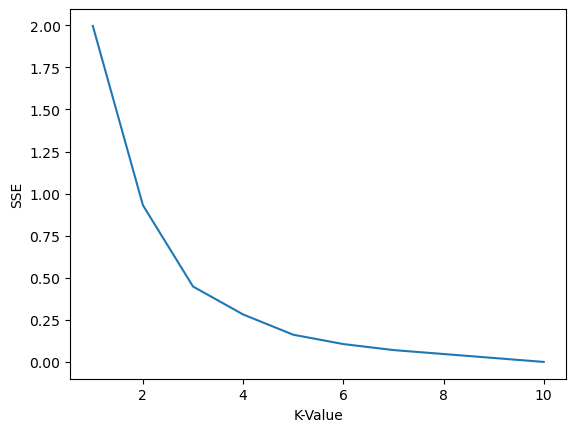

In [32]:
plt.xlabel('K-Value')
plt.ylabel('SSE')
plt.plot(k_rng,sse)